# ImgLib2 

Example 02: How to use Cursor, RandomAccess, and Type

Now that we have a few basics under our belts, let's take a closer look at using [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html), [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html), and [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html). You can see these same tutorials on the ImageJ Wiki [here](http://imagej.net/ImgLib2_Examples#Example_2_-_How_to_use_Cursor.2C_RandomAccess_and_Type).

The following examples illustrate how to access pixels using [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) and [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html), their basic properties, and how to modify pixel values using [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html).

Accessing pixels using a [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) means to iterate all pixels in a way similar to iterating Java collections. However, a [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) only ensures to visit each pixel exactly once, the order of iteration is not fixed in order to optimize the speed of iteration. This implies that that the order of iteration on two different [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) is not necessarily the same, see the example for "Duplicating an Img using a different ImgFactory". [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html)s can be created by any object that implements [IterableInterval](http://javadoc.imagej.net/ImgLib2/net/imglib2/IterableInterval.html), such as an [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html). [Views](http://javadoc.imagej.net/ImgLib2/net/imglib2/view/Views.html) that are not infinite can be made iterable (see the example for "Generic copying of image data"). Note that in general a [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) has significantly higher performance than a [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) and should therefore be given preference if possible.

In contrast to iterating image data, a [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) can be placed at arbitrary locations. It is possible to set them to a specific n-dimensional coordinate or move them relative to their current position. Note that relative movements are usually more performant. A [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) can be created by any object that implements [RandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html), like an [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) or a [View](http://javadoc.imagej.net/ImgLib2/net/imglib2/View.html).

[Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html) is implemented by [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) as well as [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html), which means they are able to report their current location. However, for [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) we differentiate between a **`LocalizingCursor`** and a normal [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html). A **`LocalizingCursor`** updates his position on every move, no matter if it is queried or not whereas a normal [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) computes its location on demand. Using a **`LocalizingCursor`** is more efficient if the location is queried for every pixel, a [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) will be faster when localizing only occasionally.

The [Sampler](http://javadoc.imagej.net/ImgLib2/net/imglib2/Sampler.html) interface implemented by [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) and [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) provides access to the [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html) instance of the current pixel. Using the [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html) instance it is possible to read and write its current value. Depending on the capabilities of the [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html) more operations are available, e.g. +, -, *, / if it is a [NumericType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/NumericType.html).

## Duplicating an Img using a generic method

The goal of this example is to make a copy of an existing [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html). For this task it is sufficient to employ [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html)s. The order of iteration for both [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html)'s will be the same as they are instantiated using the same [ImgFactory](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/ImgFactory.html). It is possible to test if two [IterableInterval](http://javadoc.imagej.net/ImgLib2/net/imglib2/IterableInterval.html)s have the same iteration order:

<code>boolean sameIterationOrder = interval1.iterationOrder().equals( interval2.iterationOrder() );</code>

The copy method itself is a generic method, it will work on any kind of [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html). In this particular case it works on a [FloatType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/real/FloatType.html), but would also work on anything else like for example a [ComplexDoubleType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/complex/ComplexDoubleType.html). The declaration of the generic type is done in the method declaration:

<code> public < T extends Type < T > > Img< T > copyImage( ... )</code>

**`< T extends Type< T > >`** basically means that **`T`** can be anything that extends [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html). These can be final implementations such as [FloatType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/real/FloatType.html) or also intermediate interfaces such as [RealType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/RealType.html). This, however, also means that in the method body only operations supported by [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html) will be available. Note that the method returns a **`T`**, which also means that in the constructor from which we call method it will also return an **`Img< FloatType >`** as we provide it with one.

In [10]:
import io.scif.img.ImgIOException
import net.imglib2.Cursor
import net.imglib2.img.Img
import net.imglib2.type.Type
 
/**
* Generic, type-agnostic method to create an identical copy of an Img
*
* @param input - the Img to copy
* @return - the copy of the Img
*/
construct03 = new Object() {
  public < T extends Type< T > > Img< T > copyImage( final Img< T > input ) {
    // create a new Image with the same properties
    // note that the input provides the size for the new image as it implements
    // the Interval interface
    output = input.factory().create( input, input.firstElement() )
 
    // create a cursor for both images
    cursorInput = input.cursor()
    cursorOutput = output.cursor()
 
    // iterate over the input
    while ( cursorInput.hasNext())
    {
      // move both cursors forward by one pixel
      cursorInput.fwd()
      cursorOutput.fwd()
 
      // set the value of this pixel of the output image to the same as the input,
      // every Type supports T.set( T type )
      cursorOutput.get().set( cursorInput.get() )
    }
 
    // return the copy
    return output
  }
}

Script1​$1​@27a5cf0f

We will now make a copy of an Image into another one using the generic method above.

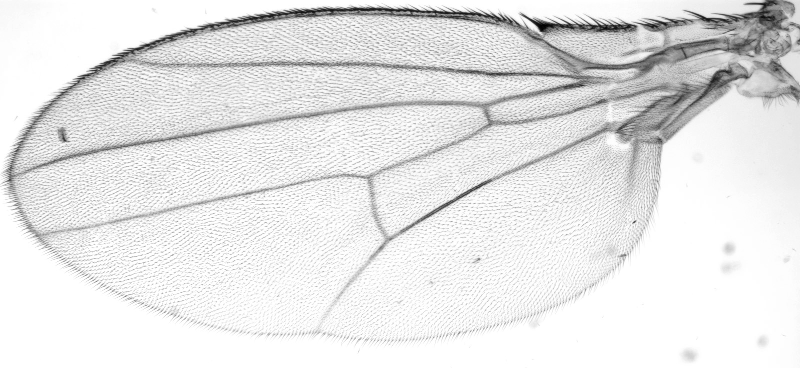

In [11]:
import io.scif.img.ImgOpener
import net.imglib2.type.numeric.real.FloatType

// open with ImgOpener as a FloatType
img = new ImgOpener().openImg( "http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new FloatType() )
 
// copy the image, as it is a generic method it also works with FloatType
duplicate = construct03.copyImage( img )

## Duplicating an Img using a different ImgFactory

<span style="color:red">WARNING: The **copyImageWrong** method in this example makes a mistake on purpose!</span> It intends to show that the iteration order of [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html)s is important to consider. The goal is to copy the content of an [ArrayImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/array/ArrayImg.html) (i.e. an [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) that was created using an [ArrayImgFactory](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/array/ArrayImgFactory.html)) into a [CellImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/cell/CellImg.html). Using only [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html)s for both images will have a wrong result as an [ArrayImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/array/ArrayImg.html) and a [CellImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/cell/CellImg.html) have different iteration orders. An [ArrayImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/array/ArrayImg.html) is iterated linearly, while a [CellImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/cell/CellImg.html) is iterated cell-by-cell, but linearly within each cell.

In [12]:
import net.imglib2.Cursor
import net.imglib2.img.Img
import net.imglib2.img.ImgFactory
import net.imglib2.type.Type

/**
* WARNING: This method makes a mistake on purpose!
*/
construct04 = new Object() {
  public < T extends Type< T >> Img< T > copyImageWrong( final Img< T > input, final ImgFactory< T > imgFactory ) {
    // create a new Image with the same dimensions but the other imgFactory
    // note that the input provides the size for the new image as it
    // implements the Interval interface
    output = imgFactory.create( input, input.firstElement() )
 
    // create a cursor for both images
    cursorInput = input.cursor()
    cursorOutput = output.cursor()
 
    // iterate over the input cursor
    while ( cursorInput.hasNext())
    {
      // move both forward
      cursorInput.fwd()
      cursorOutput.fwd()
 
      // set the value of this pixel of the output image, every Type supports T.set( T type )
      cursorOutput.get().set( cursorInput.get() )
    }
 
    // return the copy
    return output
    }
}

Script3​$1​@7529af4a

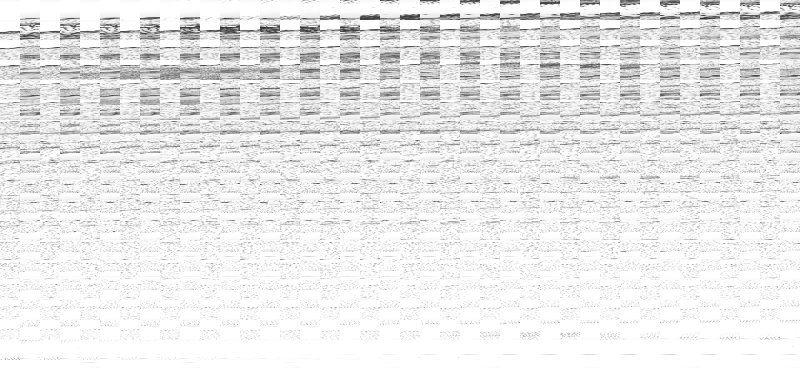

In [13]:
import io.scif.img.ImgOpener
import net.imglib2.img.Img
import net.imglib2.img.array.ArrayImgFactory
import net.imglib2.img.cell.CellImgFactory
import net.imglib2.type.numeric.real.FloatType

// open with ImgOpener. In addition to using ImgOptions, we can directly
// pass an ImgFactory to the ImgOpener. This bypasses the Img selection
// heuristic and allows custom ImgFactory implementations to be used
img = (Img< FloatType >) new ImgOpener().openImg( "http://samples.fiji.sc/tutorials/DrosophilaWing.tif",
    new ArrayImgFactory< FloatType >() )
 
// copy the image into a CellImg with a cellsize of 20x20
duplicate = construct04.copyImageWrong( img, new CellImgFactory< FloatType >( 20 ) )

<span style="color:red">The correct code for the copy-method (in **copyImageCorrect**) requires the use of a [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html).</span> We use a [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) to iterate over all pixels of the input and a [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) which we set to the same location as the output. Note that the **setPosition()** call of the [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) directly takes the [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) as input, which is possible because [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) implements [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html). Please also note that we use a **LocalizingCursor** instead of a normal [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) because we need the location of the [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) at every pixel.

In [14]:
import net.imglib2.Cursor
import net.imglib2.RandomAccess
import net.imglib2.img.Img
import net.imglib2.img.ImgFactory
import net.imglib2.type.Type

/**
* This method copies the image correctly, using a RandomAccess.
*/
construct05 = new Object() {
  public < T extends Type< T >> Img< T > copyImageCorrect( final Img< T > input, final ImgFactory< T > imgFactory )
  {
    // create a new Image with the same dimensions but the other imgFactory
    // note that the input provides the size for the new image by implementing the Interval interface
    Img< T > output = imgFactory.create( input, input.firstElement() )
 
    // create a cursor that automatically localizes itself on every move
    Cursor< T > cursorInput = input.localizingCursor()
    RandomAccess< T > randomAccess = output.randomAccess()
 
    // iterate over the input cursor
    while ( cursorInput.hasNext())
    {
      // move input cursor forward
      cursorInput.fwd()
 
      // set the output cursor to the position of the input cursor
      randomAccess.setPosition( cursorInput )
 
      // set the value of this pixel of the output image, every Type supports T.set( T type )
      randomAccess.get().set( cursorInput.get() )
    }
    // return the copy
    return output
  }
}

Script10​$1​@56454b34

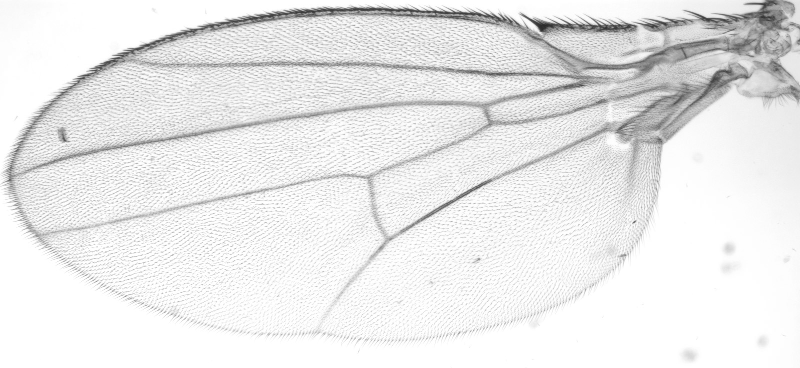

In [15]:
import io.scif.img.ImgOpener
import net.imglib2.img.Img
import net.imglib2.img.array.ArrayImgFactory
import net.imglib2.img.cell.CellImgFactory
import net.imglib2.type.numeric.real.FloatType

// open with ImgOpener. In addition to using ImgOptions, we can directly
// pass an ImgFactory to the ImgOpener. This bypasses the Img selection
// heuristic and allows custom ImgFactory implementations to be used
img = (Img< FloatType >) new ImgOpener().openImg( "http://samples.fiji.sc/tutorials/DrosophilaWing.tif",
    new ArrayImgFactory< FloatType >() )
 
// copy the image into a CellImg with a cellsize of 20x20
duplicate = construct05.copyImageCorrect( img, new CellImgFactory< FloatType >( 20 ) )

## Generic copying of image data

In order to write a method that generically copies data requires an implementation for the underlying concepts of [RandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html), [Iterable](http://javadoc.imagej.net/Java/java/lang/Iterable.html?is-external=true) and [Interval](http://javadoc.imagej.net/ImgLib2/net/imglib2/Interval.html). In that way, it will run on [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html), [View](http://javadoc.imagej.net/ImgLib2/net/imglib2/View.html) and any other class implemented for these interfaces (even if they do not exist yet).

Therefore we design the copy method in a way that the target is an [IterableInterval](http://javadoc.imagej.net/ImgLib2/net/imglib2/IterableInterval.html) and the source is [RandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html). In this way, we simply iterate over the target and copy the corresponding pixels from the source.

As the source only needs to be [RandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html), it can be basically anything that can return a value at a certain location. This can be as simple as an [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html), but also interpolated sparse data, a function, a ray-tracer, a [View](http://javadoc.imagej.net/ImgLib2/net/imglib2/View.html), ....

As the target needs to be an [IterableInterval](http://javadoc.imagej.net/ImgLib2/net/imglib2/IterableInterval.html), it is more confined. This, however does not necessarily mean that it can only be an [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) or a [View](http://javadoc.imagej.net/ImgLib2/net/imglib2/View.html) that is not infinite. It simply means it has to be something that is iterable and not infinite, which for example also applies to sparse data (e.g. a list of locations and their values).

In [16]:
import net.imglib2.IterableInterval
import net.imglib2.RandomAccessible
import net.imglib2.type.Type

/**
     * Copy from a source that is just RandomAccessible to an IterableInterval. Latter one defines
     * size and location of the copy operation. It will query the same pixel locations of the
     * IterableInterval in the RandomAccessible. It is up to the developer to ensure that these
     * coordinates match.
     *
     * Note that both, input and output could be Views, Img or anything that implements
     * those interfaces.
     *
     * @param source - a RandomAccess as source that can be infinite
     * @param target - an IterableInterval as target
     */
construct06 = new Object() {
    public < T extends Type< T > > void copy( final RandomAccessible< T > source, final IterableInterval< T >
        target )
    {
        // create a cursor that automatically localizes itself on every move
        targetCursor = target.localizingCursor()
        sourceRandomAccess = source.randomAccess()
 
        // iterate over the input cursor
        while ( targetCursor.hasNext())
        {
            // move input cursor forward
            targetCursor.fwd()
 
            // set the output cursor to the position of the input cursor
            sourceRandomAccess.setPosition( targetCursor )
 
            // set the value of this pixel of the output image, every Type supports T.set( T type )
            targetCursor.get().set( sourceRandomAccess.get() )
        }
    }
}

Script7​$1​@32ade9a

First, we will copy an Image into another with a LocalizingCursor.

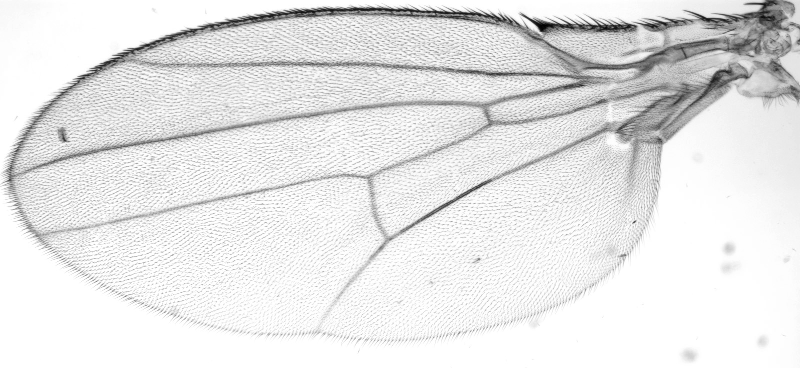

In [17]:
import io.scif.img.ImgOpener
import net.imglib2.type.numeric.real.FloatType
 
// open with ImgOpener as a float
img = new ImgOpener().openImg("http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new FloatType())
 
// copy & display an image
duplicate = img.factory().create( img, img.firstElement() )
construct06.copy( img, duplicate )
duplicate

Then, we will copy an Image into another with a RandomAccess.

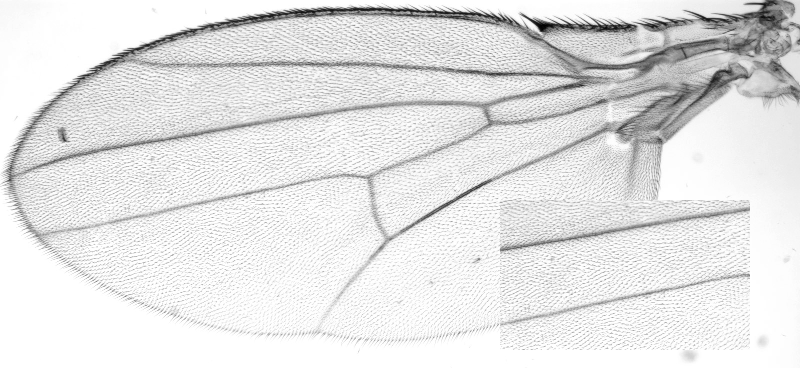

In [18]:
import io.scif.img.ImgOpener
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.view.Views
 
// open with ImgOpener as a float
img = new ImgOpener().openImg("http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new FloatType())
 
// use a View to define an interval as source for copying
// Views.offsetInterval() does not only define where it is, but also adds a translation
// so that the minimal coordinate (upper left) of the view maps to (0,0)
long[] offset = [100, 100]
long[] dimension = [250, 150]
viewSource = Views.offsetInterval( img, offset, dimension)
 
// and as target
long[] targetOffset = [500, 200]
long[] targetDimension = [250, 150]
viewTarget = Views.offsetInterval( img, targetOffset, targetDimension)
 
// now we make the target iterable
// (which is possible because it is a RandomAccessibleInterval)
iterableTarget = Views.iterable( viewTarget )
 
// copy it into the original image (overwriting part of img)
construct06.copy( viewSource, iterableTarget )
 
// show the original image
img